In [1]:
#Esthers Notebook


#!pip install ipywidgets

import ipywidgets as widgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file = "../Esther's Resources/ABBREV.csv"  #US food gov file https://catalog.data.gov/dataset?tags=food-consumption


df = pd.read_csv(file)
df.head()


NDB_No                 Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
0    1001          BUTTER,WITH SALT      15.87         717         0.85   
1    1002  BUTTER,WHIPPED,WITH SALT      15.87         717         0.85   
2    1003      BUTTER OIL,ANHYDROUS       0.24         876         0.28   
3    1004               CHEESE,BLUE      42.41         353        21.40   
4    1005              CHEESE,BRICK      41.11         371        23.24   

   Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  ...  \
0          81.11     2.11            0.06           0.0           0.06  ...   
1          81.11     2.11            0.06           0.0           0.06  ...   
2          99.48     0.00            0.00           0.0           0.00  ...   
3          28.74     5.11            2.34           0.0           0.50  ...   
4          29.68     3.18            2.79           0.0           0.51  ...   

   Vit_K_(µg)  FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  Cholestrl_(mg)  GmWt_1  \
0         7.0      51.368       21.021        3.043           215.0     5.0   
1         7.0      50.489       23.426        3.012           219.0     3.0   
2         8.6      61.924       28.732        3.694           256.0    12.0   
3         2.4      18.669        7.778        0.800            75.0    28.0   
4         2.5      18.764        8.598        0.784            94.0   132.0   

                   GmWt_Desc1  GmWt_2       GmWt_Desc2  Refuse_Pct  
0  1 pat,  (1" sq, 1/3" high)    14.2           1 tbsp         0.0  
1  1 pat,  (1" sq, 1/3" high)     9.4           1 tbsp         0.0  
2                      1 tbsp   205.0            1 cup         0.0  
3                        1 oz    17.0     1 cubic inch         0.0  
4                1 cup, diced   113.0  1 cup, shredded         0.0  

[5 rows x 53 columns]

In [18]:
df.columns

Index(['NDB_No', 'Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)',
       'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)',
       'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct'],
      dtype='object')

In [19]:
df["Shrt_Desc"].value_counts()

BEEF,CHUCK,UNDER BLADE CNTR STEAK,BNLESS,DENVER CUT,LN,0" FA    2
POPCORN,OIL-POPPED,LOFAT                                        2
OIL,INDUSTRIAL,PALM KERNEL (HYDROGENATED),CONFECTION FAT        2
BABYFOOD,MEAT,BF,STR                                            2
TURKEY FROM WHL,NECK,MEAT ONLY,CKD,SIMMRD                       1
                                                               ..
BEEF,CHUCK,MOCK TENDER STEAK,LN,0" FAT,SEL,CKD,BRLD             1
HEADCHEESE,PORK                                                 1
CHICKEN,BROILERS OR FRYERS,DRUMSTK,MEAT&SKN,RAW                 1
CHEESE,PAST PROCESS,AMERICAN,LOFAT                              1
PURSLANE,CKD,BLD,DRND,WO/SALT                                   1
Name: Shrt_Desc, Length: 8614, dtype: int64

In [2]:
#names = pd.read_csv(file, usecols=['Shrt_Desc', 'Carbohydrt_(g)']).items
import pprint
pp = pprint.PrettyPrinter(indent=4)

df = pd.read_csv(file)
categories = { }

for index, row in df.iterrows():
    name=row['Shrt_Desc']
    maincat =(name.split(",")[0])
    name = name.split(",")
    name.remove(maincat)
    subcats=(','.join(name))
    subcat_data={'Cholesterol':row['Cholestrl_(mg)'],'Carbs (g)':row['Carbohydrt_(g)'], 'Calories':row['Energ_Kcal'], 'Sugars':row['Sugar_Tot_(g)'], 'Sodium': row['Sodium_(mg)'], 'Saturated fat':row['FA_Sat_(g)']}
    #     if maincat == 'MCDONALDS': 
    #         print(maincat + '->' + subcats )

    if maincat in categories.keys() and len(subcats) > 0:
        categories[maincat][subcats]=subcat_data
    elif len(subcats) >0:
        categories[maincat]={subcats:subcat_data}
    
pp.pprint(categories)
    



{   'ABALONE': {   'MIXED SPECIES,RAW': {   'Calories': 105,
                                            'Carbs (g)': 6.01,
                                            'Cholesterol': 85.0,
                                            'Saturated fat': 0.149,
                                            'Sodium': 301.0,
                                            'Sugars': 0.0},
                   'MXD SP,CKD,FRIED': {   'Calories': 189,
                                           'Carbs (g)': 11.05,
                                           'Cholesterol': 94.0,
                                           'Saturated fat': 1.646,
                                           'Sodium': 591.0,
                                           'Sugars': nan}},
    'ABIYUCH': {   'RAW': {   'Calories': 69,
                              'Carbs (g)': 17.6,
                              'Cholesterol': nan,
                              'Saturated fat': 0.014,
                              'Sodium': 20.0,
   

In [31]:
for key in sorted(categories.keys()):
    print(key)


ABALONE
ABIYUCH
ACEROLA
ACEROLA JUICE
ACORN FLOUR
ACORNS
AGAVE
AGUTUK
ALCOHOLIC BEV
ALFALFA SEEDS
ALLSPICE
ALMOND BUTTER
ALMONDS
AMARANTH GRAIN
AMARANTH LEAVES
ANCHOVY
ANIMAL FAT
APPLE JUC
APPLEBEE'S
APPLES
APPLESAUCE
APRICOT NECTAR
APRICOTS
ARCHWAY HOME STYLE COOKIES
ARCHWAY Home Style Cookies
ARROWHEAD
ARROWROOT
ARTICHOKES
ARTIFICIAL BLUEBERRY MUFFIN MIX
ARUGULA
ASPARAGUS
AUSTIN
AVOCADOS
BABY FD
BABYFD
BABYFOO
BABYFOOD
BACON
BACON BITS
BAGEL
BAGELS
BAK CHOC
BAKING CHOC
BALSAM-PEAR (BITTER GOURD)
BAMBOO SHOOTS
BANANAS
BARBARA DEE
BARBECUE LOAF
BARLEY
BASIL
BASS
BEANS
BEAR
BEAR NAKED
BEE
BEECHNUTS
BEEF
BEEF BROTH&TOMATO JUC
BEEF JERKY
BEEF MACARONI W/ TOMATO SAU
BEEF POT PIE
BEEF SAUSAGE
BEEF STEW
BEERWURST
BEET GREENS
BEET GRNS
BEETS
BEV
BEVE
BEVERAGE
BEVERAGES
BF
BISCUIT
BISCUITS
BISON
BLACKBERRIES
BLACKBERRY JUC
BLUEBERRIES
BLUEFISH
BOLOGNA
BORAGE
BOYSENBERRIES
BRATWURST
BRAUNSCHWEIGER (A LIVER SAUSAGE)
BRAZILNUTS
BREAD
BREAD CRUMBS
BREAD STICKS
BREAD STUFFING
BREADFRUIT
BREADFRUIT 

In [3]:
len(categories.keys())

1235

In [23]:
subcat_data
subcats

'GREEN,RAW'

In [12]:
newdf = pd.DataFrame(categories["MCDONALDS"])
newdf
newdf.to_csv(r'mcdonalds',index = False)

In [24]:
for key in sorted(subcat_data.keys()):
    print(key)


Calories
Carbs (g)
Cholesterol
Saturated Fat
Sodium
Sugars


This is the nutrition checker! Please refer to above listed keys and select inputs from what is availble :)


What is your main food category mcdonalds
What nutrient would you like to analyze? Carbs (g)


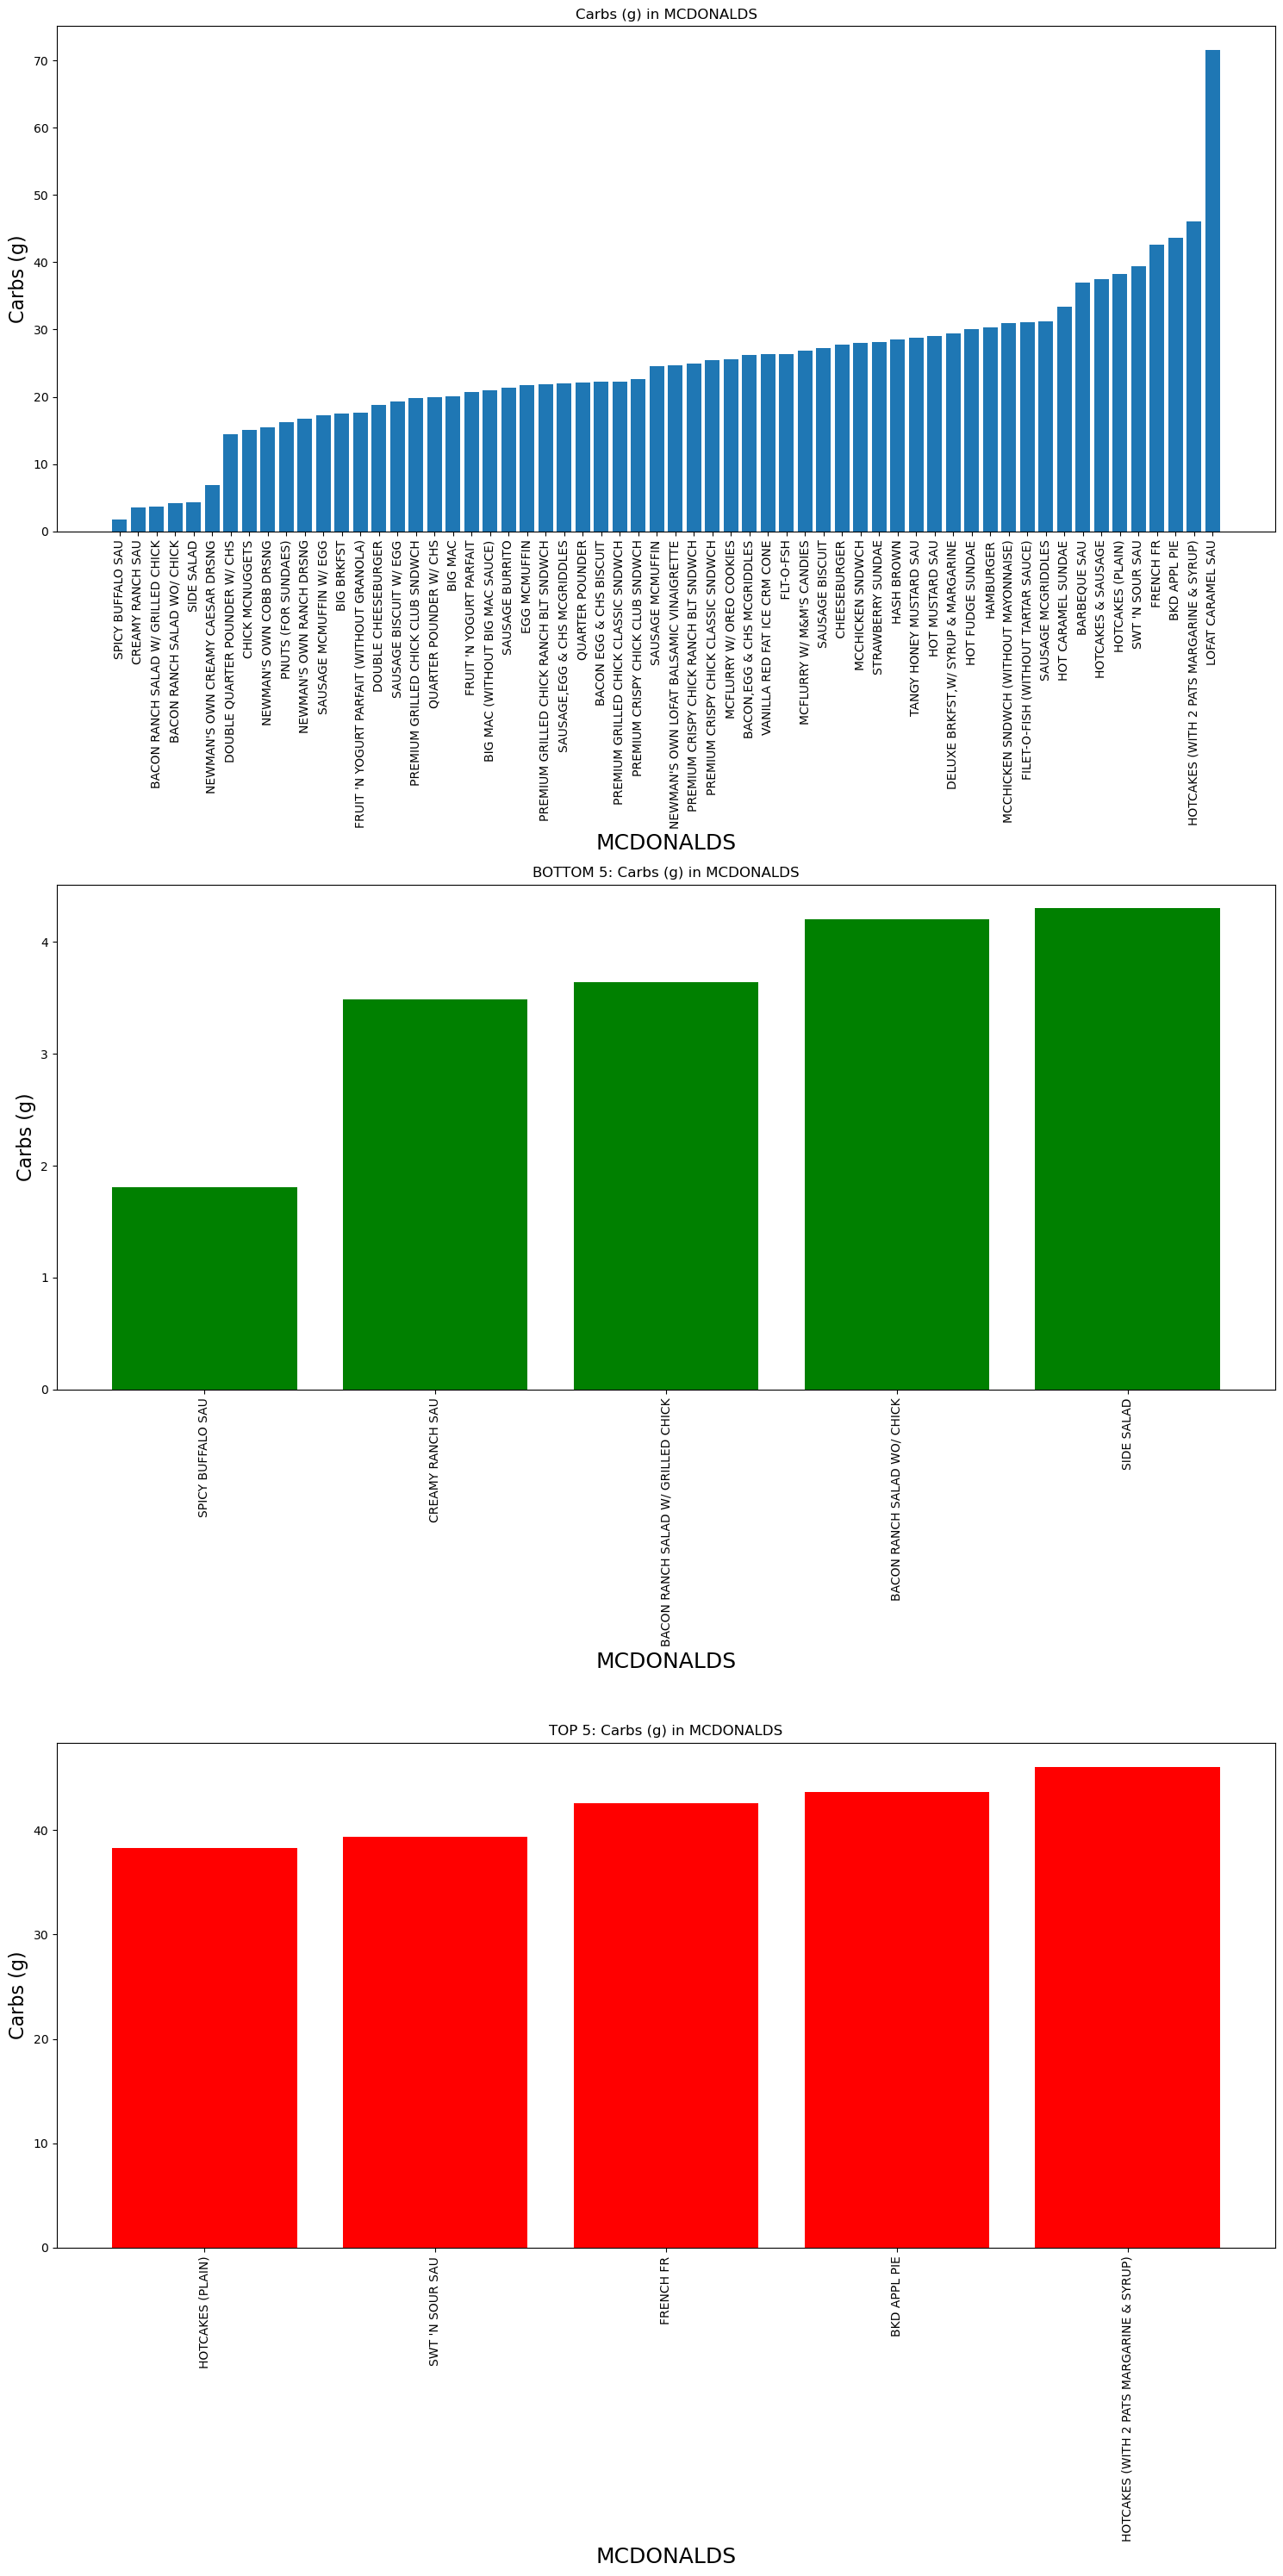

In [39]:
print("This is the nutrition checker! Please refer to above listed keys and select inputs from what is availble :)")

selectedcategory = input("What is your main food category").upper()
category_data = categories[selectedcategory]
selectednutrient = input("What nutrient would you like to analyze?").capitalize()
def sortByNutrient(item):
    #print(item)
    return item["value"] #index 0 is the key and index 1 is the selected nutrient
#returns a value we want it to be sorted 


sorted_data = []
for item in category_data.items(): #items is both the keys and the items in the dictionary
    sorted_data.append({"key":item[0],"value":item[1][selectednutrient]})

sorted_data.sort(key=sortByNutrient)
sorted_data_bottom = sorted_data[0:5]
sorted_data_top = sorted_data[-6:-1]
#print(sorted_data_bottom)


x_axis = np.arange(len(sorted_data))
y_values = []
x_labels = []


for item in sorted_data:
    x_labels.append(item["key"])
    y_values.append(item["value"])
#print(y_values)
    
#print(x_axis)

#######subplots

plt.rcdefaults()
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (15, 30))

fig.subplots_adjust(top=8)


ax1.set_xticks(x_axis)
ax1.set_xticklabels(x_labels, fontsize = 10, rotation="vertical")
ax1.bar(x_axis, y_values)
ax1.set_xlabel(f'{selectedcategory}', fontsize=18)
ax1.set_ylabel(f'{selectednutrient}', fontsize=16)
ax1.set_title(f'{selectednutrient} in {selectedcategory}')
#plt.savefig("./Esther's Resources/calories.png")



#########bottom 5 code


x_axis = np.arange(len(sorted_data_bottom))
y_values = []
x_labels = []


for item in sorted_data_bottom:
    x_labels.append(item["key"])
    y_values.append(item["value"])
#print(y_values)
    
#print(x_axis)


#fig2.xticks(x_axis,x_labels,fontsize = 5, rotation="vertical")
ax2.set_xticks(x_axis)
ax2.set_xticklabels(x_labels, fontsize = 10, rotation="vertical")
ax2.bar(x_axis, y_values, color='green')
ax2.set_xlabel(f'{selectedcategory}', fontsize=18)
ax2.set_ylabel(f'{selectednutrient}', fontsize=16)
ax2.set_title(f'BOTTOM 5: {selectednutrient} in {selectedcategory}')


#########top 5 code


x_axis = np.arange(len(sorted_data_top))
y_values = []
x_labels = []


for item in sorted_data_top:
    x_labels.append(item["key"])
    y_values.append(item["value"])
#print(y_values)
    
#print(x_axis)


#fig2.xticks(x_axis,x_labels,fontsize = 5, rotation="vertical")
ax3.set_xticks(x_axis)
ax3.set_xticklabels(x_labels, fontsize = 10, rotation="vertical")
ax3.bar(x_axis, y_values, color='red')
ax3.set_xlabel(f'{selectedcategory}', fontsize=18)
ax3.set_ylabel(f'{selectednutrient}', fontsize=16)
ax3.set_title(f'TOP 5: {selectednutrient} in {selectedcategory}')


fig.tight_layout()

#fig.savefig(f"../Esther's Resources/{selectednutrient}allplots.png")






#tick_locations = [value+0.4 for value in x_axis]
#plt.figure(figsize=(20,3))


# plt.bar(x_axis, food_df2["Carbohydrt_(g)"], color='r', alpha=0.5, align="edge")
# 

